In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install numpy torch pandas zarr cartopy


In [ ]:
%%capture
# Install the necessary packages
!pip install -q cfgrib matplotlib numpy
# Install eccodes and cfgrib via apt-get and pip
!apt-get install -q -y libeccodes0
!pip install -q cfgrib

In [ ]:
%%capture
!unzip '/content/drive/MyDrive/Downscaling/cerra_regridded_t_2020.zip'

In [ ]:
import zarr
import numpy as np

target = zarr.open( '/content/cerra_regridded_t_2020.zarr')
print(target.attrs['fields'])
print(list(target.keys()))

['t']
['lats', 'lons', 't', 'time']


In [ ]:
import zarr

print(np.min(target.lons))
print(np.max(target.lons))

print()
print(target.lons[2000])

-58.25
74.25

66.75


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


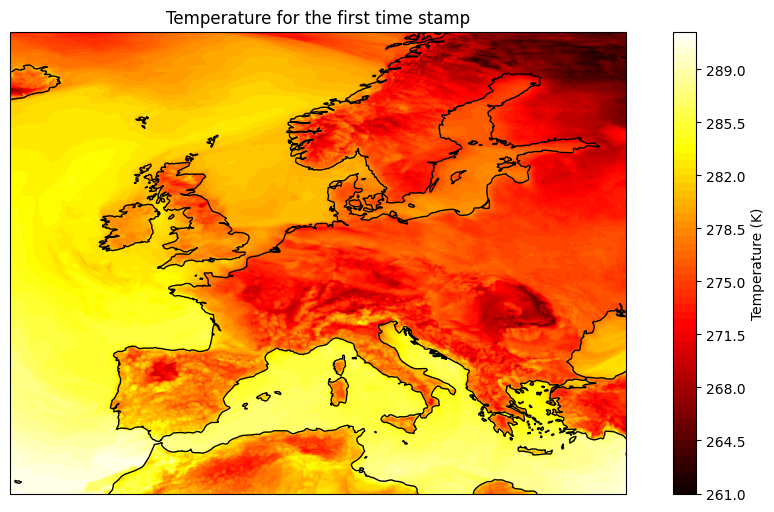

Latitude shape: (885,)
Longitude shape: (2121,)
Temperature shape: (1464, 885, 2121)
Sample latitude and longitude values:
69.25 31.75
-17.625 32.375


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Ensure you have loaded your data correctly here, for example:
# target = zarr.open('path_to_your_data.zarr', mode='r')

# Load the latitude and longitude values
lats = target['lats'][:]
lons = target['lons'][:]

# Correct the latitude and longitude indices if they are swapped
# Adjust indices according to actual data limits and correctness
temperature_data_first_time_all = target['t'][0, :, :]  # Adjust slicing as needed
temperature_data_first_time = temperature_data_first_time_all[100:700, 650:1450]

# Assuming lats and lons are 1D, correctly create a 2D grid for plotting
lon2d, lat2d = np.meshgrid(lons[650:1450], lats[100:700])

# Create the plot
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Plot the temperature data
contour = ax.contourf(lon2d, lat2d, temperature_data_first_time, 60,
                      transform=ccrs.PlateCarree(), cmap='hot')

# Add colorbar and title
plt.colorbar(contour, label='Temperature (K)')
plt.title('Temperature for the first time stamp')
plt.show()

# Print shapes and specific values to verify correctness
lat_shape = target['lats'].shape
lon_shape = target['lons'].shape
t_shape = target['t'].shape  # This will give you the shape in the form [time, lat, lon]

print(f"Latitude shape: {lat_shape}")
print(f"Longitude shape: {lon_shape}")
print(f"Temperature shape: {t_shape}")

print(f"Sample latitude and longitude values:")
print(target['lats'][100], target['lats'][700])
print(target['lons'][650], target['lons'][1450])


In [ ]:
print(f"Latitude shape: {lat_shape}")
print(f"Longitude shape: {lon_shape}")
print(f"Temperature shape: {t_shape}")
print(target['lats'][100])
print(target['lats'][700])

print(target['lons'][650])
print(target['lons'][1450])

print()

print(target['lons'][2120])
print(target['lons'][2000])
print()

print("Min / Max: Source")
print("lons")

print("Min / Max: Target")
print("lons")
print(np.min(target['lons']))
print(np.max(target['lons']))
print()
print(target['lons'][1200])
print(target['lons'][2120])



Latitude shape: (885,)
Longitude shape: (2121,)
Temperature shape: (1464, 885, 2121)
69.25
31.75
-17.625
32.375

74.25
66.75

Min / Max: Source
lons
Min / Max: Target
lons
-58.25
74.25

16.75
74.25


['t']
['lats', 'lons', 't', 'time']
(600, 800)


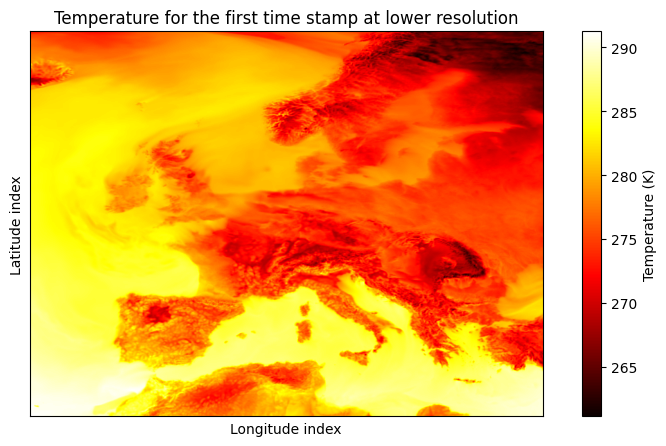

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import zarr

# Open the dataset using zarr
target = zarr.open('/content/cerra_regridded_t_2020.zarr')
print(target.attrs['fields'])
print(list(target.keys()))

# Define step sizes for latitude and longitude
lat_step = 1
lon_step = 1

# Load the temperature data for the first time step
# Reduce the resolution by taking every 'lat_step'th point in latitude and 'lon_step'th point in longitude
temperature_data_first_time_all = target['t'][0, 100:700:lat_step, :]  # Every 'lat_step'th latitude from 100 to 700
temperature_data_first_time = temperature_data_first_time_all[:, 650:1450:lon_step]  # Every 'lon_step'th longitude from 650 to 1450
print(temperature_data_first_time.shape)

# Create the plot as a regular image
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data with lower resolution
cax = ax.imshow(temperature_data_first_time, cmap='hot', origin='upper')
ax.set_title('Temperature for the first time stamp at lower resolution')
ax.set_xlabel('Longitude index')
ax.set_ylabel('Latitude index')

# Add a colorbar to the plot
fig.colorbar(cax, label='Temperature (K)')

# Remove x and y ticks if not needed
ax.set_xticks([])
ax.set_yticks([])

plt.show()


Modifying the Dataset Loader


/usr/local/lib/python3.10/dist-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(
ERROR:cfgrib.messages:skipping corrupted Message
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/cfgrib/messages.py", line 273, in itervalues
    yield self.filestream.message_from_file(file, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/cfgrib/messages.py", line 340, in message_from_file
    return Message.from_file(file, offset, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/cfgrib/messages.py", line 96, in from_file
    codes_id = eccodes.codes_grib_new_from_file(file)
  File "/usr/local/lib/python3.10/dist-packages/gribapi/gribapi.py", line 409, in grib_new_from_file
    GRIB_CHECK(err)
  File "/usr/local/lib/python3.10/dist-packages/gribapi/gribapi.py", line 226, in GRIB_CHECK
    errors.raise_grib_error(errid)
  File "/usr/local/lib/python3.10/dist-packag

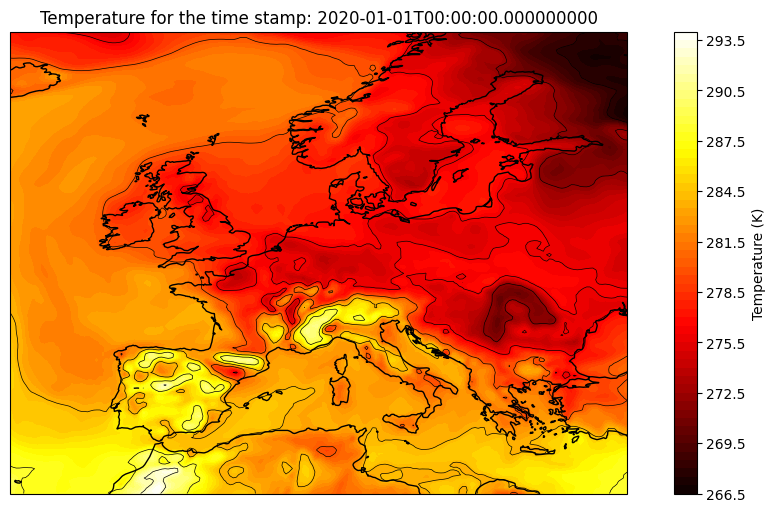

Latitude shape: (150,)
Longitude shape: (200,)
Temperature shape: (150, 200)
Sample Latitude: 69.06
Sample Longitude: -17.62


In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cfgrib

# Open the GRIB file using cfgrib
grib_path = '/content/era5_2020_own1.grib'  # Change to your grib file path
ds = cfgrib.open_datasets(grib_path)[0]

# Extract the temperature data for the first time step
# Now 't' is the temperature variable according to the dataset info you provided
temperature_data_first_time_all = ds['t'].isel(time=0).values

# Select the range of latitudes and longitudes as per your data
# Since your latitude and longitude are already sorted in the dataset,
# you can directly slice the array without needing to search for indices
temperature_data_first_time = temperature_data_first_time_all[:, :]

# Assuming 't' is the temperature variable and 'time', 'latitude', and 'longitude' are coordinate variables
temperature_data = ds['t'].isel(time=0).values
latitudes = ds['latitude'].values
longitudes = ds['longitude'].values
time = ds['time'].values[0]

# Create 2D grids for latitudes and longitudes
longitudes_2d, latitudes_2d = np.meshgrid(longitudes, latitudes)

# Create a Cartopy plot with PlateCarree projection
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines for reference
ax.coastlines()

# Plot the temperature data with contour lines
temperature_contour = ax.contourf(longitudes_2d, latitudes_2d, temperature_data_first_time, 60,
                                  transform=ccrs.PlateCarree(), cmap='hot', origin='lower')

# Plot contour lines
ax.contour(longitudes_2d, latitudes_2d, temperature_data, colors='black', linewidths=0.5, transform=ccrs.PlateCarree())

# Add a colorbar and a title
cbar = plt.colorbar(temperature_contour, label='Temperature (K)')
plt.title(f"Temperature for the time stamp: {time}")

# Display the plot
plt.show()

# Print out the shapes and sample coordinate values
print(f"Latitude shape: {latitudes.shape}")
print(f"Longitude shape: {longitudes.shape}")
print(f"Temperature shape: {temperature_data.shape}")

# Print sample latitudes and longitudes
print(f"Sample Latitude: {latitudes[0]}")
print(f"Sample Longitude: {longitudes[0]}")


['t']
(1464, 150, 200)


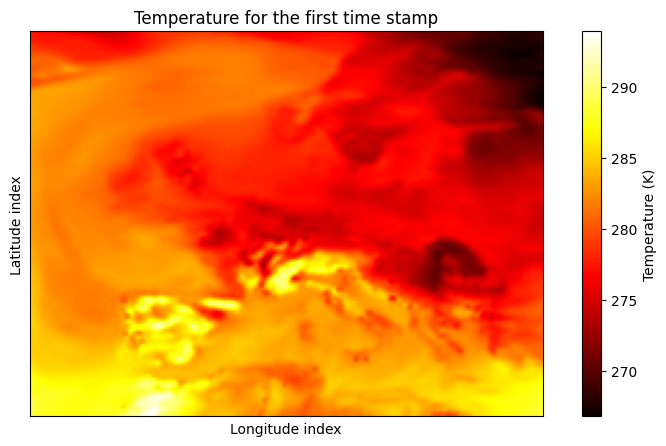

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cfgrib

# Open the GRIB file using cfgrib
grib_path = '/content/era5_2020_own1.grib'  # Change to your grib file path
ds = cfgrib.open_datasets(grib_path)[0]
print(list(ds.keys()))
# Extract the temperature data for the first time step
# Now 't' is the temperature variable according to the dataset info you provided
temperature_data_first_time_all = ds['t'].isel(time=0).values
temperature_data_first_time_all = ds['t'].values
print(temperature_data_first_time_all.shape)


# Select the range of latitudes and longitudes as per your data
# Since your latitude and longitude are already sorted in the dataset,
# you can directly slice the array without needing to search for indices
temperature_data_first_time = temperature_data_first_time_all[0,:, :]


# Get the latitude and longitude at the reduced resolution
# print("Latitude: ")
# print(target.lats[100:700:lat_step])  # Adjusted to every 'lat_step'th latitude
# print("Longitude: ")
# print(target.lons[650:1450:lon_step])  # Adjusted to every 'lon_step'th longitude

# Create the plot as a regular image
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data with lower resolution
cax = ax.imshow(temperature_data_first_time, cmap='hot', origin='upper')
ax.set_title('Temperature for the first time stamp')
ax.set_xlabel('Longitude index')
ax.set_ylabel('Latitude index')

# Add a colorbar to the plot
fig.colorbar(cax, label='Temperature (K)')

# Remove x and y ticks if not needed
ax.set_xticks([])
ax.set_yticks([])

plt.show()


In [ ]:
import xarray as xr
import cfgrib

# Path to your GRIB file
grib_path = '/content/era5_2020_own1.grib'

# Try opening the dataset, handling potential errors gracefully
try:
    ds = xr.open_dataset(grib_path, engine='cfgrib')
    print(ds)

    # Print dimensions and ranges
    print("Data dimensions (lat x lon):", dict(ds.dims))
    if 'latitude' in ds.coords and 'longitude' in ds.coords:
        print("Latitude range:", ds.latitude.data.min(), "to", ds.latitude.data.max())
        print("Longitude range:", ds.longitude.data.min(), "to", ds.longitude.data.max())

    # Print data variables
    print("Data variables (channels):", list(ds.data_vars))

    # Print range of data
    for var in ds.data_vars:
        print(f"Range of {var}: {ds[var].min().data} to {ds[var].max().data}")

    # Print total data points by calculating the product of dimensions
    total_data_points = 1
    for dim_size in ds.dims.values():
        total_data_points *= dim_size
    print("Total data points:", total_data_points)

except Exception as e:
    print("Failed to load GRIB data due to an error:", str(e))


In [ ]:
import xarray as xr
import pandas as pd
import numpy as np

# Load the dataset
ds = xr.open_dataset('/content/era5_2020_own1.grib', engine='cfgrib')

# 1. Check Temporal Coverage
expected_times = pd.date_range("2020-01-01", "2020-12-31 18:00:00", freq="6H")
actual_times = ds.indexes['time']
missing_times = expected_times.difference(actual_times)

print("Missing time points:", missing_times)

# 2. Check Spatial Coverage
expected_lats = np.linspace(31.81, 69.06, num=int((69.06-31.81)/0.25) + 1) # Change step to match your dataset
expected_lons = np.linspace(-17.62, 32.13, num=int((32.13+17.62)/0.25) + 1) # Change step to match your dataset

missing_lats = set(expected_lats) - set(ds.latitude.values)
missing_lons = set(expected_lons) - set(ds.longitude.values)

print("Missing latitude points:", missing_lats)
print("Missing longitude points:", missing_lons)

# 3. Check for Corrupted Data Entries
# Assuming 't' is your temperature variable
if ds['t'].isnull().any():
    print("There are null or NaN values in the temperature data.")
else:
    print("No null or NaN values detected in the temperature data.")

# Optionally, check for unreasonable temperature values (customize threshold as necessary)
unreasonable_temp = ds['t'].where((ds['t'] < 180) | (ds['t'] > 330), drop=True)
if not unreasonable_temp.isnull().all():
    print(f"Found potentially unreasonable temperature values: {unreasonable_temp}")


In [ ]:
import xarray as xr
import pandas as pd

# Load the dataset
ds = xr.open_dataset('/content/era5_2020_own1.grib', engine='cfgrib')

# Extract time data
time_data = ds['time'].values

# Convert to pandas datetime for better readability
time_series = pd.to_datetime(time_data)

# Create a DataFrame for better visualization
time_df = pd.DataFrame(time_series, columns=['Timestamp'])

# Display the DataFrame
print(time_df)


In [ ]:
import xarray as xr

# Attempt to reload the dataset and print dimensions
try:
    ds = xr.open_dataset('/content/era5_2020_own1.grib', engine='cfgrib')
    print(ds.dims)
except Exception as e:
    print("Error loading dataset:", e)


In [ ]:
import zarr
import numpy as np

# Open the Zarr dataset
target = zarr.open('/content/cerra_regridded_t_2020.zarr', mode='r')

# Print information about each array
for array_name in ['lats', 'lons', 't', 'time']:
    array = target[array_name]
    print(f"{array_name} - shape: {array.shape}, dtype: {array.dtype}")

# Additional information can be obtained by directly examining one of the arrays
# For example, let's examine the 't' array for temperature
temp_data = target['t'][:]
print("Temperature data range:", np.min(temp_data), "to", np.max(temp_data))

# Print the first and last timestamps if 'time' array is in a recognizable time format
time_data = target['time'][:]
print("First timestamp:", np.min(time_data), "Last timestamp:", np.max(time_data))

# Assuming latitude and longitude arrays are 1D, print their ranges
lats = target['lats'][:]
lons = target['lons'][:]
print("Latitude range:", np.min(lats), "to", np.max(lats))
print("Longitude range:", np.min(lons), "to", np.max(lons))


In [ ]:
import zarr
import numpy as np
from google.colab import files

# Open the Zarr dataset
target = zarr.open('/content/cerra_regridded_t_2020.zarr', mode='r')

# Load the temperature data for the first time step
# Reduce the resolution by taking every 'lat_step'th point in latitude and 'lon_step'th point in longitude

# Define chunk size for latitude and longitude
lat_chunk_size = 100
lon_chunk_size = 200

# Define the range for latitude and longitude
lat_start = 100
lat_end = 700
lon_start = 650
lon_end = 1450

# Initialize variables to store temperature data
temperature_data = []

def process_temperature_data(lat_start, lat_end, lon_start, lon_end):
    # Store concatenated data for all latitudes
    lat_concatenated_data = []

    # Iterate over latitude range in chunks
    for lat in range(lat_start, lat_end, lat_chunk_size):
        lat_chunk_end = min(lat + lat_chunk_size, lat_end)

        # Store data for the current latitude chunk across all longitudes
        lon_concatenated_data = []

        # Iterate over longitude range in chunks
        for lon in range(lon_start, lon_end, lon_chunk_size):
            lon_chunk_end = min(lon + lon_chunk_size, lon_end)

            # Extract temperature data for the current chunk
            print(f"Processing chunk: lat {lat}-{lat_chunk_end}, lon {lon}-{lon_chunk_end}")
            chunk = target['t'][:, lat:lat_chunk_end, lon:lon_chunk_end]
            lon_concatenated_data.append(chunk)

        # Concatenate along the longitude dimension
        full_lon_concatenated = np.concatenate(lon_concatenated_data, axis=2)
        lat_concatenated_data.append(full_lon_concatenated)

    # Concatenate along the latitude dimension
    full_lat_concatenated = np.concatenate(lat_concatenated_data, axis=1)
    return full_lat_concatenated

# Process temperature data in chunks
temperature_data_concatenated = process_temperature_data(lat_start, lat_end, lon_start, lon_end)



# Save the concatenated temperature data array
np.save('cerra_temperature_data_correct.npy', temperature_data_concatenated)

# Print the shape of concatenated temperature data
print("Shape of concatenated temperature data:", temperature_data_concatenated.shape)




# Define chunk size for reading data
chunk_size = 100  # Adjust this value based on your dataset and available memory

# Function to process data in chunks
def process_data_in_chunks(array):
    for i in range(0, array.shape[0], chunk_size):
        chunk = array[i:i+chunk_size]
        # Process chunk here
        # Example: Calculate min/max for each chunk
        min_val = np.min(chunk)
        max_val = np.max(chunk)
        print(f"Chunk min: {min_val}, max: {max_val}")

# Iterate over arrays in the dataset
for array_name in ['lats', 'lons', 'time']:
    array = target[array_name]
    print(f"Processing {array_name} array...")
    process_data_in_chunks(array)

def process_temperature_data(array):
    for t in range(0, array.shape[0], chunk_size):
        for lat in range(0, array.shape[1], chunk_size):
            for lon in range(0, array.shape[2], chunk_size):
                chunk = array[t:t+chunk_size, lat:lat+chunk_size, lon:lon+chunk_size]
                # Process chunk here
                # Example: Calculate min/max for each chunk
                min_val = np.min(chunk)
                max_val = np.max(chunk)
                print(f"Chunk (time:{t}-{t+chunk_size}, lat:{lat}-{lat+chunk_size}, lon:{lon}-{lon+chunk_size}) min: {min_val}, max: {max_val}")

# Process temperature data
temp_array = temperature_data_concatenated
print("Processing temperature data...")
process_temperature_data(temp_array)

(1464, 600, 800)


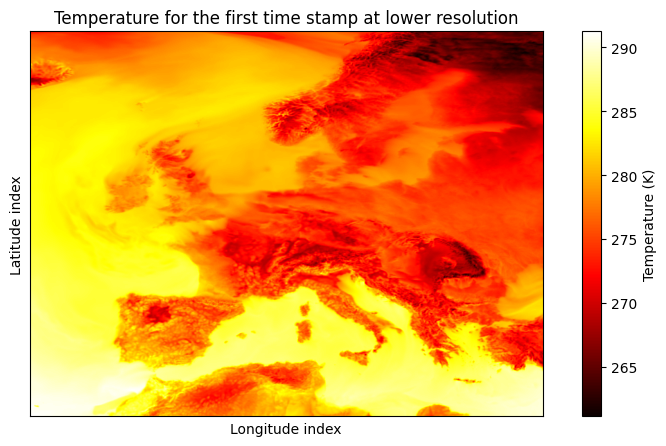

(1464, 600, 800)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Choose the correct file that matches your data structure
# Assuming that 'axis_2' is the correct one if longitude corresponds to axis=2
temperature_data = np.load('cerra_temperature_data_correct.npy')

print(temperature_data.shape)

# Select the array for the first time stamp
temperature_data_first_time = temperature_data[0]

# Create the plot as a regular image
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the data
cax = ax.imshow(temperature_data_first_time, cmap='hot', origin='upper')
ax.set_title('Temperature for the first time stamp at lower resolution')
ax.set_xlabel('Longitude index')
ax.set_ylabel('Latitude index')

# Add a colorbar to the plot
fig.colorbar(cax, label='Temperature (K)')

# Remove x and y ticks if not needed
ax.set_xticks([])
ax.set_yticks([])

plt.show()
print(temperature_data.shape)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Create directory if it doesn't exist
if not os.path.exists('/content/input_cerra_images'):
    os.makedirs('/content/input_cerra_images')

# Load temperature data
temperature_data = np.load('/content/cerra_temperature_data_correct.npy')
print(temperature_data.shape)

# Loop through each time stamp in the data
for i in range(temperature_data.shape[0]):
    # Select the array for the current time stamp
    temperature_data_current_time = temperature_data[i]

    # Create the plot as a regular image
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot the data
    cax = ax.imshow(temperature_data_current_time, cmap='hot', origin='upper')
    ax.set_title(f'Temperature for time stamp {i} at lower resolution')
    ax.set_xlabel('Longitude index')
    ax.set_ylabel('Latitude index')

    # Add a colorbar to the plot
    fig.colorbar(cax, label='Temperature (K)')

    # Remove x and y ticks if not needed
    ax.set_xticks([])
    ax.set_yticks([])

    # Save the figure to the specified folder every 5th time stamp starting from the first
    if i % 5 == 0:  # Saves 0th, 5th, 10th, etc.
        plt.savefig(f'input_cerra_images/temperature_time_{i}.png')

    # Close the figure to free up memory
    plt.close(fig)

print(temperature_data.shape)


(1464, 600, 800)
(1464, 600, 800)


In [ ]:
import numpy as np
import cv2
import os

# Open the GRIB file using cfgrib
grib_path = '/content/era5_2020_own1.grib'  # Change to your grib file path
ds = cfgrib.open_datasets(grib_path)[0]
print(list(ds.keys()))
# Extract the temperature data for the first time step
# Now 't' is the temperature variable according to the dataset info you provided
temeprature_source = ds['t'].values
print(temeprature_source.shape)

def prepare_dataset(data, output_dir, img_size_small=(64, 64), img_size_big=(256, 256)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Normalize data to a 0-1 range
    min_val = np.min(data)
    max_val = np.max(data)
    data_normalized = (data - min_val) / (max_val - min_val)

    for i in range(data.shape[0]):
        # Convert the slice to an RGB image by stacking
        img = np.stack((data_normalized[i],) * 3, axis=-1)

        # Resize to high-resolution image
        high_res_img = cv2.resize(img, img_size_big, interpolation=cv2.INTER_CUBIC)

        # Create low-resolution image by downsizing then upsizing
        low_res_img = cv2.resize(high_res_img, img_size_small, interpolation=cv2.INTER_AREA)
        low_res_img = cv2.resize(low_res_img, img_size_big, interpolation=cv2.INTER_CUBIC)

        # Save the high-res and low-res images
        cv2.imwrite(os.path.join(output_dir, f'high_res_{i}.png'), high_res_img * 255)
        cv2.imwrite(os.path.join(output_dir, f'low_res_{i}.png'), low_res_img * 255)

# Example usage of the function
data_path = '/content/image_data'
prepare_dataset(temperature_data_concatenated, data_path)


In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize

def prepare_dataset_with_hot_colormap(data, output_dir, img_size_small=(64, 64), img_size_big=(256, 256), cmap='hot'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Normalize data to a 0-1 range
    min_val = np.min(data)
    max_val = np.max(data)
    data_normalized = (data - min_val) / (max_val - min_val)

    # Get the colormap
    colormap = cm.get_cmap(cmap)

    # Normalize object for converting the normalized data to colors
    norm = Normalize(vmin=0, vmax=1)

    for i in range(data.shape[0]):
        # Convert normalized data to color data using colormap
        img_colored = colormap(norm(data_normalized[i]))[..., :3]  # Drop alpha channel

        # Convert color data (0-1 range) to 0-255 range for saving as image
        img_colored = (img_colored * 255).astype(np.uint8)

        # Resize to high-resolution image
        high_res_img = cv2.resize(img_colored, img_size_big, interpolation=cv2.INTER_CUBIC)

        # Create low-resolution image by downsizing then upsizing
        low_res_img = cv2.resize(high_res_img, img_size_small, interpolation=cv2.INTER_AREA)
        low_res_img = cv2.resize(low_res_img, img_size_big, interpolation=cv2.INTER_CUBIC)

        # Save the high-res and low-res images
        cv2.imwrite(os.path.join(output_dir, f'high_res_{i}.png'), high_res_img)
        cv2.imwrite(os.path.join(output_dir, f'low_res_{i}.png'), low_res_img)

    # Plot a sample image with a colorbar indicating the temperature scale
    fig, ax = plt.subplots()
    cax = ax.imshow(data_normalized[0], cmap=cmap)
    cbar = fig.colorbar(cax, orientation='vertical')
    cbar.set_label('Normalized Temperature')
    plt.savefig(os.path.join(output_dir, 'sample_with_scale.png'))
    plt.close()

# Example usage of the function
data_path = '/content/image_colored'
prepare_dataset_with_hot_colormap(temperature_data_concatenated, data_path)


In [ ]:
!rm -rf /content/SuperResolution_using_UNET_for_temperature_downscaling/resulting_img/

In [ ]:
import numpy as np
import cv2
import os

def prepare_dataset_with_colormap(data, output_dir, img_size_small=(64, 64), img_size_big=(256, 256)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Normalize data to a 0-255 range for colormap application
    min_val = np.min(data)
    max_val = np.max(data)
    data_normalized = ((data - min_val) / (max_val - min_val) * 255).astype(np.uint8)

    for i in range(data.shape[0]):
        # Resize to high-resolution image
        high_res_img = cv2.resize(data_normalized[i], img_size_big, interpolation=cv2.INTER_CUBIC)

        # Apply the 'hot' colormap to high-resolution image
        high_res_colored = cv2.applyColorMap(high_res_img, cv2.COLORMAP_HOT)

        # Create low-resolution image by downsizing then upsizing
        low_res_img = cv2.resize(high_res_img, img_size_small, interpolation=cv2.INTER_AREA)
        low_res_img = cv2.resize(low_res_img, img_size_big, interpolation=cv2.INTER_CUBIC)

        # Apply the 'hot' colormap to low-resolution image
        low_res_colored = cv2.applyColorMap(low_res_img, cv2.COLORMAP_HOT)

        # Save the high-res and low-res colored images
        cv2.imwrite(os.path.join(output_dir, f'high_res_{i}.png'), high_res_colored)
        cv2.imwrite(os.path.join(output_dir, f'low_res_{i}.png'), low_res_colored)

# Example usage of the function
data_path = '/content/image_color_data'
prepare_dataset_with_colormap(temperature_data_concatenated, data_path)


In [ ]:
import numpy as np
import cv2
import os

def prepare_dataset_with_colormap(data, output_dir, img_size_small=(64, 64), img_size_big=(256, 256)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Normalize data to a 0-255 range for colormap application
    min_val = np.min(data)
    max_val = np.max(data)
    data_normalized = ((data - min_val) / (max_val - min_val) * 255).astype(np.uint8)

    for i in range(data.shape[0]):
        # Resize to high-resolution image
        high_res_img = cv2.resize(data_normalized[i], img_size_big, interpolation=cv2.INTER_CUBIC)

        # Apply the 'hot' colormap to high-resolution image
        high_res_colored = cv2.applyColorMap(high_res_img, cv2.COLORMAP_HOT)

        # Create low-resolution image by downsizing then upsizing
        low_res_img = cv2.resize(high_res_img, img_size_small, interpolation=cv2.INTER_AREA)
        low_res_img = cv2.resize(low_res_img, img_size_big, interpolation=cv2.INTER_CUBIC)

        # Apply the 'hot' colormap to low-resolution image
        low_res_colored = cv2.applyColorMap(low_res_img, cv2.COLORMAP_HOT)

        # Save the high-res and low-res colored images
        cv2.imwrite(os.path.join(output_dir, f'high_res_{i}.png'), high_res_colored)
        cv2.imwrite(os.path.join(output_dir, f'low_res_{i}.png'), low_res_colored)

cerra_temperature_data_correct = np.load('/content/cerra_temperature_data_correct.npy')

# Example usage of the function
data_path = '/content/image_color_data_cerra'
prepare_dataset_with_colormap(cerra_temperature_data_correct, data_path)


In [ ]:
import numpy as np
from PIL import Image
import os

# Open the GRIB file using cfgrib
grib_path = '/content/era5_2020_own1.grib'  # Change to your grib file path
ds = cfgrib.open_datasets(grib_path)[0]

# Extract the temperature data for the first time step
# Now 't' is the temperature variable according to the dataset info you provided
temeprature_source = ds['t'].values
print(temeprature_source.shape)

# Assume `data` is your input array of shape (1464, 150, 200)
data = np.array(temeprature_source)  # This would be your actual temperature data

# Normalize the data to [0, 255]
data_min = data.min()
data_max = data.max()
data_normalized = (data - data_min) / (data_max - data_min) * 255
data_normalized = data_normalized.astype(np.uint8)  # Convert to unsigned byte format

# Create a directory for output images if it doesn't exist
output_dir = 'output_images'
os.makedirs(output_dir, exist_ok=True)

# Generate and save images
for i in range(data_normalized.shape[0]):
    img = Image.fromarray(data_normalized[i])
    img.save(os.path.join(output_dir, f'image_{i:04d}.png'))

print(f'Generated {data_normalized.shape[0]} images in the directory {output_dir}')


(1464, 150, 200)
Generated 1464 images in the directory output_images


In [ ]:
import cfgrib
import matplotlib.pyplot as plt
import os

# Create directory if it doesn't exist
if not os.path.exists('/content/input_era_images'):
    os.makedirs('/content/input_era_images')

# Open the GRIB file using cfgrib
grib_path = '/content/era5_2020_own1.grib'  # Change to your grib file path
ds = cfgrib.open_datasets(grib_path)[0]

# Assuming 't' is the temperature variable and is 3D: time, latitude, longitude
temperature_data = ds['t'].values

# Loop through each time step in the data
for i in range(temperature_data.shape[0]):
    # Select the array for the current time stamp
    temperature_data_current_time = temperature_data[i]

    # Create the plot as a regular image
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot the data
    cax = ax.imshow(temperature_data_current_time, cmap='hot', origin='upper')
    ax.set_title(f'Temperature for time stamp {i} at lower resolution')
    ax.set_xlabel('Longitude index')
    ax.set_ylabel('Latitude index')

    # Add a colorbar to the plot
    fig.colorbar(cax, label='Temperature (°C)')  # Adjust unit if necessary

    # Remove x and y ticks if not needed
    ax.set_xticks([])
    ax.set_yticks([])

    # Save the figure to the specified folder every 5th time stamp starting from the first
    if i % 5 == 0:  # Saves 0th, 5th, 10th, etc.
        plt.savefig(f'/content/input_era_images/temperature_time_{i}.png')

    # Close the figure to free up memory
    plt.close(fig)


In [ ]:
!git clone https://github.com/taifarif94/SuperResolution_using_UNET_for_temperature_downscaling.git
!pip install tensorflow opencv-python scikit-learn matplotlib

In [ ]:
%cd /content/SuperResolution_using_UNET_for_temperature_downscaling
!python TrainUNETmodel.py

2024-04-27 02:51:35.291140: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inEnhanced_UNET/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-04-27 02:51:36.133276: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-04-27 02:51:42.108754: I external/local_xla/xla/service/service.cc:168] XLA service 0x5c0d92150280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-27 02:51:42.108805: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2024-04-27 02:51:42.115561: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1714186302.237003  113125 device_compiler.h:186] Compiled cluster using XLA!  This li

In [ ]:
!rm -rf /content/SuperResolution_using_UNET_for_temperature_downscaling/resulting_img/
!rm -rf /content/SuperResolution_using_UNET_for_temperature_downscaling/resulting_model/
import os
os.kill(os.getpid(), 9)

In [ ]:
!rm -rf /content/SuperResolution_using_UNET_for_temperature_downscaling/test_evaluations


In [ ]:
!zip -r /content/source_target_output_grey_scaled.zip /content/SuperResolution_using_UNET_for_temperature_downscaling/resulting_img

  adding: content/SuperResolution_using_UNET_for_temperature_downscaling/resulting_img/ (stored 0%)
  adding: content/SuperResolution_using_UNET_for_temperature_downscaling/resulting_img/test_img_42.png (deflated 27%)
  adding: content/SuperResolution_using_UNET_for_temperature_downscaling/resulting_img/train_img_22.png (deflated 27%)
  adding: content/SuperResolution_using_UNET_for_temperature_downscaling/resulting_img/train_img_9.png (deflated 28%)
  adding: content/SuperResolution_using_UNET_for_temperature_downscaling/resulting_img/test_img_14.png (deflated 29%)
  adding: content/SuperResolution_using_UNET_for_temperature_downscaling/resulting_img/train_img_2.png (deflated 28%)
  adding: content/SuperResolution_using_UNET_for_temperature_downscaling/resulting_img/train_img_42.png (deflated 27%)
  adding: content/SuperResolution_using_UNET_for_temperature_downscaling/resulting_img/train_img_37.png (deflated 26%)
  adding: content/SuperResolution_using_UNET_for_temperature_downscalin

In [ ]:
import numpy as np
from PIL import Image
import os
import xarray as xr
import cfgrib

# Open the GRIB file using cfgrib
grib_path = '/content/era5_2020_own1.grib'  # Change to your grib file path
ds = cfgrib.open_datasets(grib_path)[0]

# Extract the temperature data for the first time step
# Now 't' is the temperature variable according to the dataset info you provided
temeprature_source = ds['t'].values
print(temeprature_source.shape)


# Assume `data` is your input array of shape (1464, 150, 200)
data = np.array(temeprature_source)  # This would be your actual temperature data

# Normalize the data to [0, 255]
data_min = data.min()
data_max = data.max()
data_normalized = (data - data_min) / (data_max - data_min) * 255
data_normalized = data_normalized.astype(np.uint8)  # Convert to unsigned byte format

# Create a directory for output images if it doesn't exist
output_dir = 'output_images_grey'
os.makedirs(output_dir, exist_ok=True)

# Generate and save images as grayscale
for i in range(data_normalized.shape[0]):
    img = Image.fromarray(data_normalized[i], 'L')  # 'L' specifies the grayscale mode
    img.save(os.path.join(output_dir, f'image_{i:04d}.png'))

print(f'Generated {data_normalized.shape[0]} images in the directory {output_dir}')


/usr/local/lib/python3.10/dist-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.24.2
  warnings.warn(


(1464, 150, 200)
Generated 1464 images in the directory output_images_grey


In [ ]:
import numpy as np
from PIL import Image
import os
import cfgrib
import zarr

# Define the function to normalize and save images
def normalize_and_save_images(data, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    data_min = data.min()
    data_max = data.max()
    data_normalized = (data - data_min) / (data_max - data_min) * 255
    data_normalized = data_normalized.astype(np.uint8)

    for i in range(data_normalized.shape[0]):
        img = Image.fromarray(data_normalized[i], 'L')
        img.save(os.path.join(output_dir, f'image_{i:04d}.png'))
    print(f'Generated {data_normalized.shape[0]} images in the directory {output_dir}')

# Part 1: Process GRIB data
grib_path = '/content/era5_2020_own1.grib'
ds = cfgrib.open_datasets(grib_path)[0]
temperature_data = ds['t'].values  # Assuming 't' is your temperature variable
print(temperature_data.shape)
normalize_and_save_images(temperature_data, 'output_images_grey_from_grib')

# Part 2: Process .npy data
npy_path = '/content/cerra_temperature_data_correct.npy'
temperature_data_npy = np.load(npy_path)
print(temperature_data_npy.shape)
normalize_and_save_images(temperature_data_npy, 'output_images_grey_from_npy')

# # Part 3: Process data from Zarr array
# zarr_path = 'path_to_your_zarr_directory'
# temperature_data_zarr = zarr.open(zarr_path, mode='r')['temperature']  # Adjust based on actual structure
# print(temperature_data_zarr.shape)
# normalize_and_save_images(temperature_data_zarr, 'output_images_grey_from_zarr')


(1464, 150, 200)
Generated 1464 images in the directory output_images_grey_from_grib
(1464, 600, 800)
Generated 1464 images in the directory output_images_grey_from_npy


In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2

def load_dataset(image_dir, img_size=(128, 128)):
    images = []
    file_names = sorted(os.listdir(image_dir))
    for file_name in file_names:
        img_path = os.path.join(image_dir, file_name)
        img = load_img(img_path, color_mode='grayscale', target_size=img_size)
        img = img_to_array(img)
        images.append(img)
    images = np.array(images, dtype=np.float32)
    return images

# Load high-resolution images
high_res_images = load_dataset('/content/SuperResolution_using_UNET_for_temperature_downscaling/output_images_grey', img_size=(128, 128))

def resize_images(image_array, target_size):
    resized_images = []
    for img in image_array:
        img = cv2.resize(img, target_size, interpolation=cv2.INTER_LINEAR)  # Downsample using linear interpolation
        resized_images.append(img)
    return np.array(resized_images)

# Generate low-resolution images by downsampling
low_res_images = resize_images(high_res_images, (64, 64))

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def unet_model(input_size=(64, 64, 1)):
    inputs = Input(input_size)
    # Downscaling
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    # Bottleneck
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, 3, activation='relu', padding='same')(conv2)

    # Upscaling + Concatenate
    up1 = UpSampling2D(size=(2, 2))(conv2)
    merge1 = concatenate([conv1, up1], axis=3)
    conv3 = Conv2D(64, 3, activation='relu', padding='same')(merge1)
    conv3 = Conv2D(64, 3, activation='relu', padding='same')(conv3)

    up2 = UpSampling2D(size=(2, 2))(conv3)
    conv4 = Conv2D(1, 3, activation='sigmoid', padding='same')(up2)

    model = Model(inputs, conv4)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = unet_model()

# Split data into training and validation
train_low_res = low_res_images[:int(0.8 * len(low_res_images))]
train_high_res = high_res_images[:int(0.8 * len(high_res_images))]
val_low_res = low_res_images[int(0.8 * len(low_res_images)):]
val_high_res = high_res_images[int(0.8 * len(high_res_images)):]

# Train the model
model.fit(train_low_res, train_high_res, epochs=50, batch_size=16, validation_data=(val_low_res, val_high_res))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random

# Select 5 random indices
random_indices = random.sample(range(low_res_images.shape[0]), 5)

# Predict high-res images from low-res images
predicted_high_res = model.predict(low_res_images[random_indices])

# Function to concatenate images
def concat_images(imga, imgb):
    """
    Combines two images side-by-side.
    """
    ha, wa = imga.shape[:2]
    hb, wb = imgb.shape[:2]
    max_height = np.max([ha, hb])
    total_width = wa + wb
    new_img = np.zeros(shape=(max_height, total_width), dtype=np.uint8)
    new_img[:ha, :wa] = imga
    new_img[:hb, wa:wa + wb] = imgb
    return new_img

# Prepare directory for saving results
results_dir = '/content/SuperResolution_using_UNET_for_temperature_downscaling/results_images'
os.makedirs(results_dir, exist_ok=True)

# Process and save images
for idx, low_res_img in enumerate(low_res_images[random_indices]):
    high_res_pred = predicted_high_res[idx].reshape(128, 128)  # Ensure the shape aligns with the high-res format
    high_res_pred = (high_res_pred * 255).astype(np.uint8)  # Scale back to 0-255 range if model output is normalized

    # Ensure the low-res images are resized to high-res format for better visual comparison
    low_res_img_resized = cv2.resize(low_res_img.reshape(64, 64), (128, 128), interpolation=cv2.INTER_LINEAR)
    low_res_img_resized = (low_res_img_resized * 255).astype(np.uint8)  # Scale back to 0-255 if necessary

    # Concatenate images side by side
    comparison_image = concat_images(low_res_img_resized, high_res_pred)

    # Save the concatenated image
    plt.imsave(os.path.join(results_dir, f'result_{idx}.png'), comparison_image, cmap='gray')

print(f"Saved concatenated images in the directory {results_dir}")


1/1 [==============================] - 0s 121ms/step
Saved concatenated images in the directory /content/SuperResolution_using_UNET_for_temperature_downscaling/results_images
